In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [28]:
data = pd.read_csv("../dataset/news_politics.csv")
data = data[["Content", "label"]]

In [29]:
content_clean = pd.read_csv("../dataset/news_politics_final.csv")[["Content_processed"]]

In [30]:
data["Content_processed"] = content_clean

In [31]:
data["label"].value_counts()

real    1090
fake    1002
Name: label, dtype: int64

In [32]:
data.head(5)

,Content,label,Content_processed
0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,real,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...
1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
3,Thảo luận tại hội trường Quốc hội về dự thảo ...,real,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...
4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,real,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...


In [33]:
class visualization:
  def __init__(self, data) -> None:
    self.data = data
    
  def hist_samples(self, data):
    plt.title("Number of sample")
    sns.countplot(x = data["label"], data=data)
    
  def hist_length(self, data, isClean, col):
    data["Length"+col] = data[col].apply(self.get_length_text)
    
    plt.xlabel("length")
    plt.ylabel("count")
    plt.title("")
    if isClean: 
      plt.title("Length distribution of document after preprocessing")
      plt.hist(data[data['label']=='real']["Length"+col], bins=25, histtype=u'step')
      plt.hist(data[data['label']=='fake']['Length'+col], bins=25, histtype=u'step')
    else: 
      plt.title("Length distribution of document before preprocessing")
      plt.hist(data[data['label']=="real"]['Length'+col], bins=25, histtype=u'step')
      plt.hist(data[data['label']=="fake"]['Length'+col], bins=25, histtype=u'step')

    label = ["real", 'fake']
    plt.legend(label)
    
  def get_length_text(self, text):
    return len(str(text).split())
  
  
  def plotWordCloud(self, data, col="Content", isReal="fake"):
    comment_words = ''

    # iterate through the csv file
    for val in data[data["label"] == isReal][col]:
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    contour_color='steelblue',
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("word cloud {} news".format(isReal))
    plt.show()
visualizer = visualization(data)

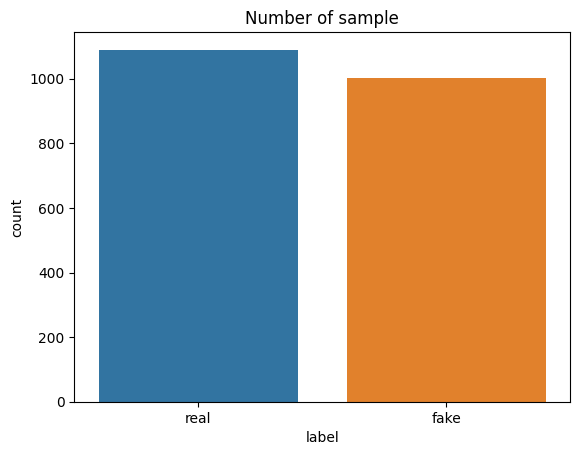

In [34]:
visualizer.hist_samples(data)

In [35]:
data.head()

,Content,label,Content_processed
0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,real,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...
1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
3,Thảo luận tại hội trường Quốc hội về dự thảo ...,real,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...
4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,real,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...


In [36]:
data.head(10)

,Content,label,Content_processed
0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,real,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...
1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
3,Thảo luận tại hội trường Quốc hội về dự thảo ...,real,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...
4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,real,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...
5,Tổng Bí thư Nguyễn Phú Trọng hội kiến Thủ t...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...
6,"Tổng Bí thư, Chủ tịch Trung Quốc Tập Cận Bì...",real,tổng_bí_thư chủ_tịch trung_quốc tập_cận_bình l...
7,Phó Thủ tướng Lê Văn Thành trình bày báo cá...,real,phó_thủ_tướng lê_văn_thành trình_bày báo_cáo t...
8,Tổng Bí thư Nguyễn Phú Trọng và Tổng Bí th...,real,tổng_bí_thư nguyễn_phú_trọng tổng_bí_thư chủ_t...
9,"Tối 31/10, Lễ trao tặng Huân chương Hữu ngh...",real,tối lễ trao_tặng huân_chương hữu_nghị cộng_hòa...


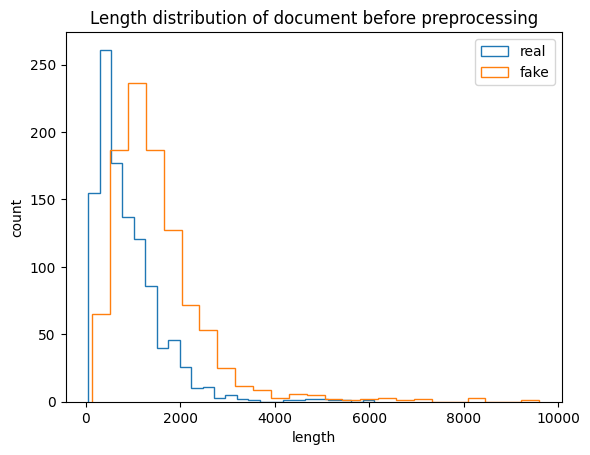

In [37]:
visualizer.hist_length(data, 0, "Content")

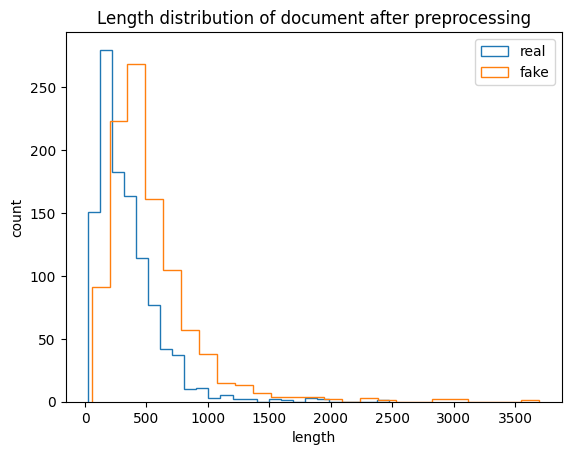

In [38]:
visualizer.hist_length(data, 1, "Content_processed")


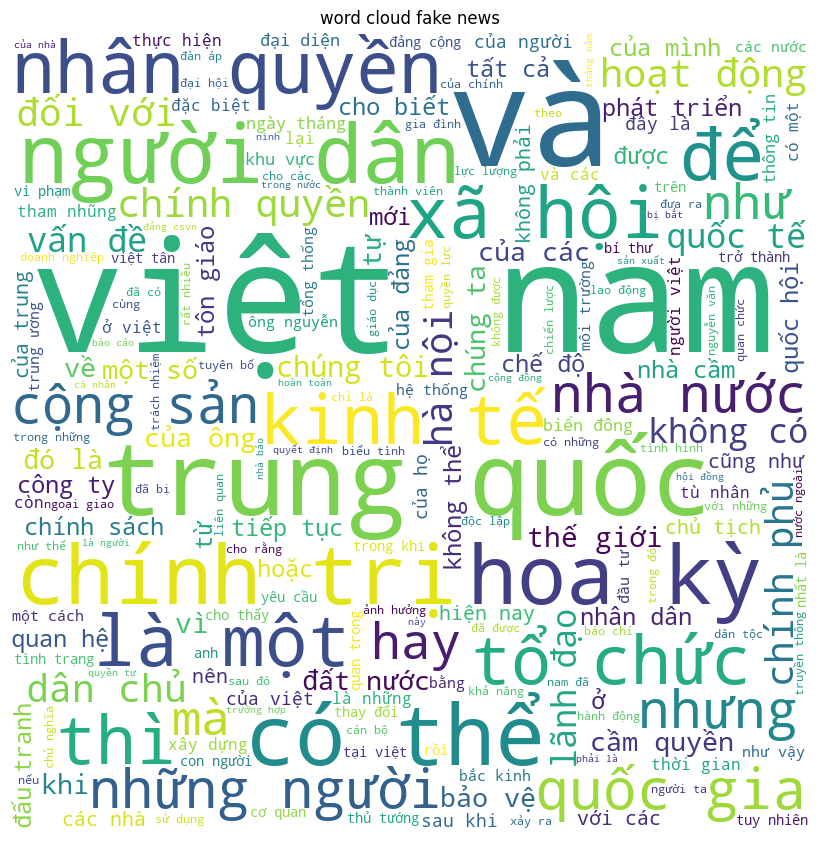

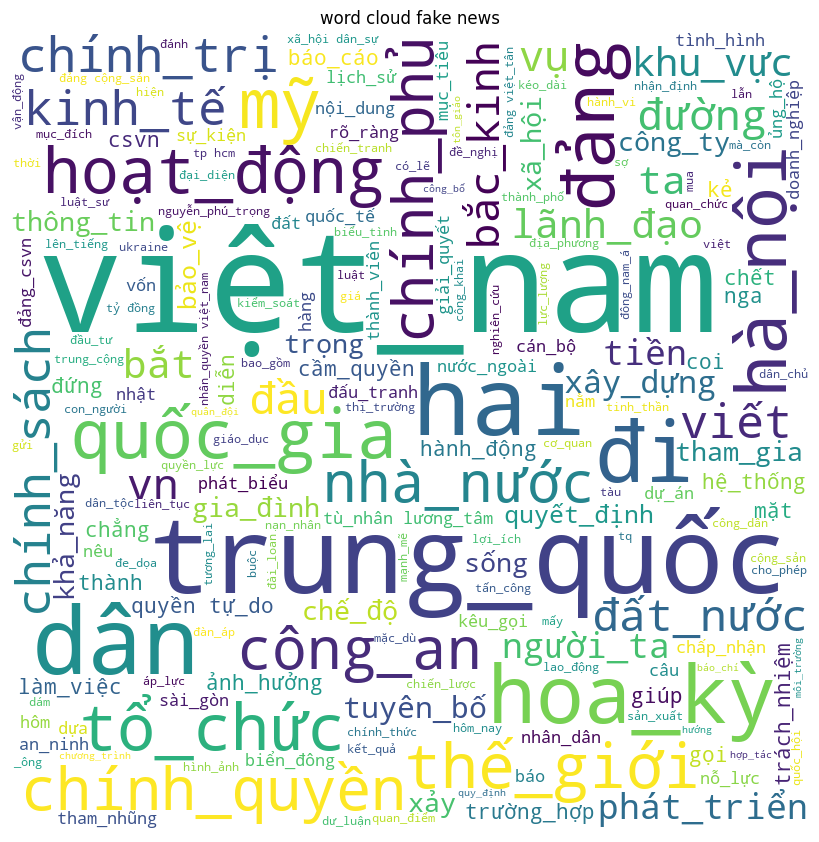

In [39]:
visualizer.plotWordCloud(data, isReal="fake")
visualizer.plotWordCloud(data,col="Content_processed", isReal="fake")

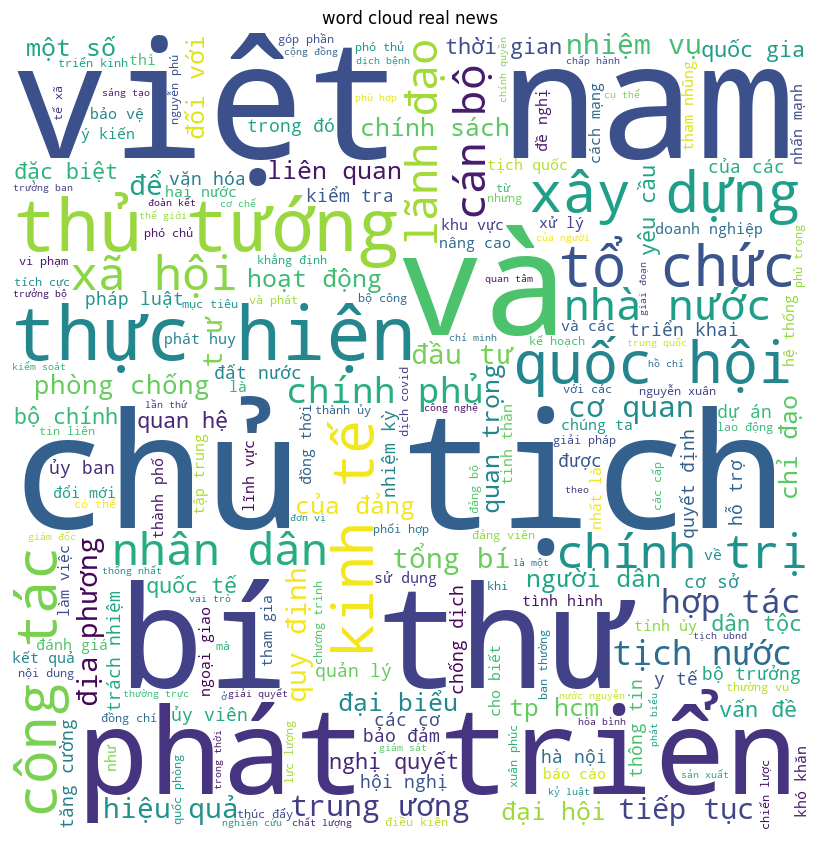

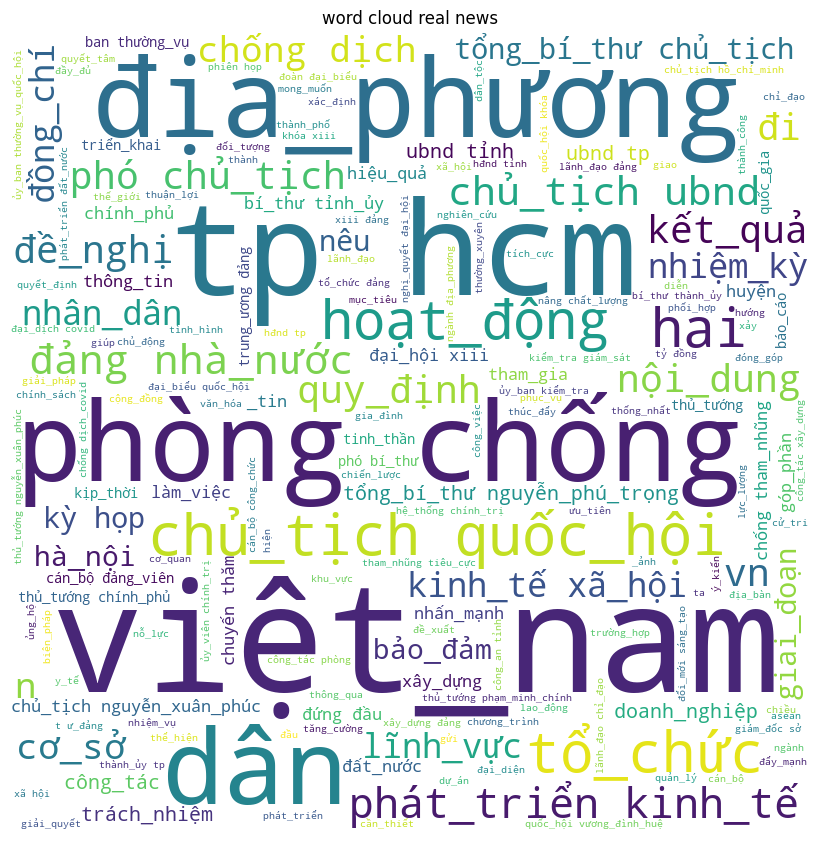

In [40]:
visualizer.plotWordCloud(data, isReal="real")
visualizer.plotWordCloud(data,col="Content_processed", isReal="real")

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(min_df=2)
tf_idf_pre = tf_idf.fit_transform(data["Content"])

In [42]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(tf_idf_pre, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=data.label, labels={'color': 'Label'}
)
fig.update_traces(marker_size=4)
fig.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_2 = TfidfVectorizer(min_df=2)
tf_idf_pre_2 = tf_idf_2.fit_transform(data["Content_processed"])

In [44]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(tf_idf_pre_2, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=data.label, labels={'color': 'Label'}
)
fig.update_traces(marker_size=4)
fig.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [45]:
from collections import Counter
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words]
    plt.figure(figsize=(10,11))
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    
    plt.show()

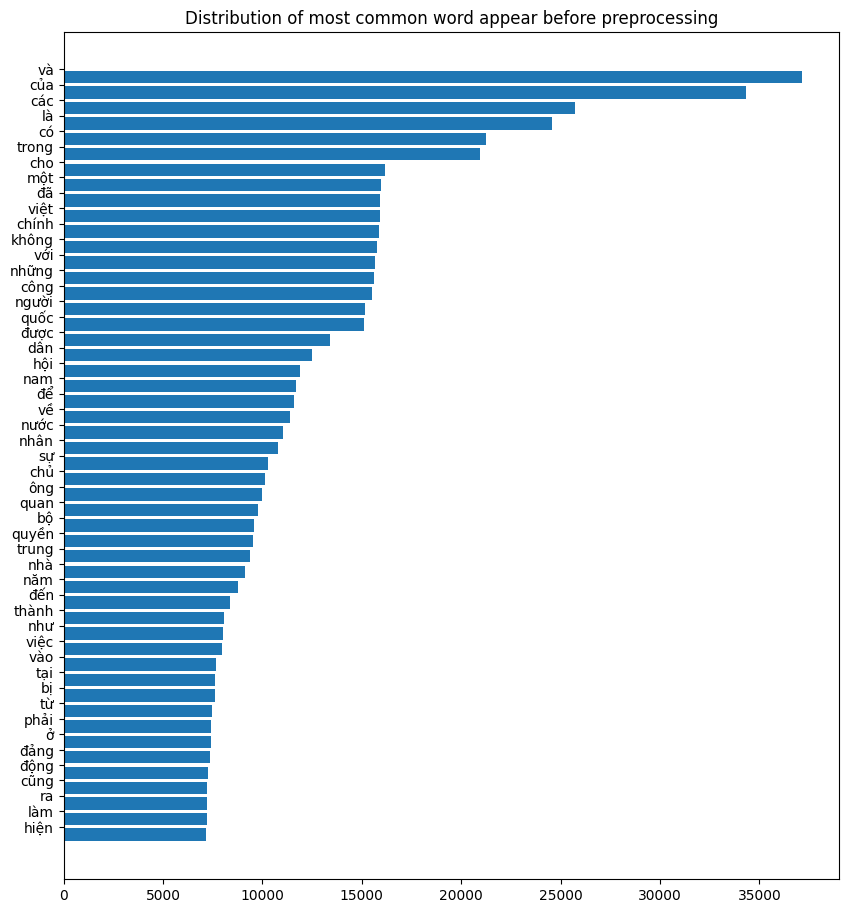

In [46]:
wordBarGraphFunction(data, "Content", "Distribution of most common word appear before preprocessing")

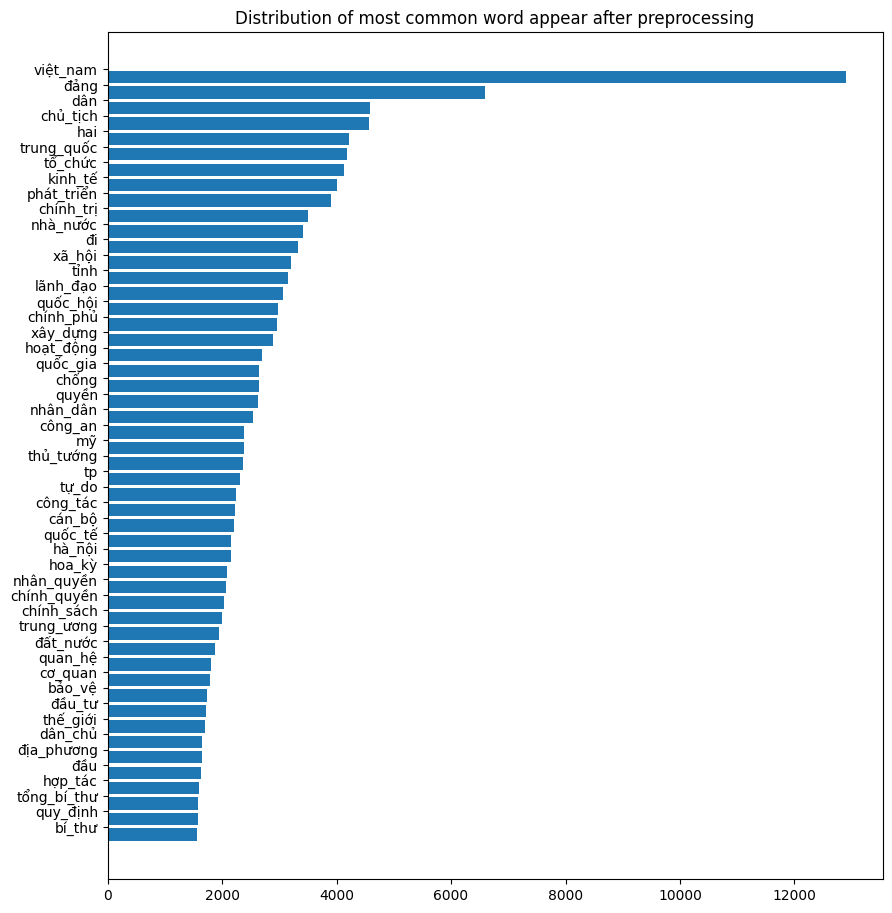

In [47]:
wordBarGraphFunction(data, "Content_processed", "Distribution of most common word appear after preprocessing")